# Integrating Sympy into GPlearn

This is a test script to see if the implenetation. However the implement wasnt successful due to incompatiable issues. The issue is elaborated more specifically on the project paper and read me

In [1]:
#loading packages & dependencies
#When the %pylab magic function is entered at the IPython prompt, it triggers the import of various modules within Matplotlib.
%pylab inline 
from somgplearn.genetic import SymbolicRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.utils.random import check_random_state
from mpl_toolkits.mplot3d import Axes3D
from sympy import *
import matplotlib.pyplot as plt
import numpy as np
import graphviz

Populating the interactive namespace from numpy and matplotlib


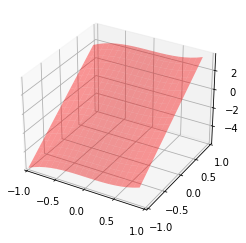

In [2]:
# Ground truth
x0 = np.arange(-1, 1, .1)
x1 = np.arange(-1, 1, .1)
x0, x1 = np.meshgrid(x0, x1)
y_truth = x0**3+ 4*x1 - 0.75 #true function

ax = plt.figure().gca(projection='3d')
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_xticks(np.arange(-1, 1.01, .5))
ax.set_yticks(np.arange(-1, 1.01, .5))
surf = ax.plot_surface(x0, x1, y_truth, rstride=1, cstride=1, color='red', alpha=0.4)
plt.show()

In [3]:
rng = check_random_state(0)

# Training samples
X_train = rng.uniform(-1, 1, 100).reshape(50, 2)
y_train = X_train[:, 0]**3+ 4*X_train[:, 1] - 0.75

# Testing samples|
X_test = rng.uniform(-1, 1, 100).reshape(50, 2)
y_test = X_test[:, 0]**3+ 4*X_test[:, 1] - 0.75

In [4]:
est_gp = SymbolicRegressor(population_size=5, #the number of programs in each generation
                           generations=30, stopping_criteria=0.01, #The required metric value required in order to stop evolution early.
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, #0.05, The probability of performing hoist mutation on a tournament winner. Hoist mutation takes the winner of a tournament and selects a random subtree from it. A random subtree of that subtree is then selected and this is ‘hoisted’ into the original subtrees location to form an offspring in the next generation. This method helps to control bloat.
                           p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.01, random_state=0)
est_gp.fit(X_train, y_train)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
hello world
<class 'list'>


C:\Users\taryar\anaconda3\lib\site-packages\sympy\core\sympify.py:456: SymPyDeprecationWarning: 

String fallback in sympify has been deprecated since SymPy 1.6. Use
sympify(str(obj)) or sympy.core.sympify.converter or obj._sympy_
instead. See https://github.com/sympy/sympy/issues/18066 for more
info.

  SymPyDeprecationWarning(


AttributeError: 'Tuple' object has no attribute 'expand'

In [ ]:
print(est_gp._program)

In [ ]:
type(est_gp._program)

In [ ]:
sim = simplify(str(est_gp._program))
print(sim)

In [ ]:
y_gp = est_gp.predict(np.c_[x0.ravel(), x1.ravel()]).reshape(x0.shape)
score_gp = est_gp.score(X_test, y_test)
y_sim = 4.04858299595142*x1 - ( 0.716 - x0**3 )
#y_tree = est_tree.predict(np.c_[x0.ravel(), x1.ravel()]).reshape(x0.shape)
#score_tree = est_tree.score(X_test, y_test)
#y_rf = est_rf.predict(np.c_[x0.ravel(), x1.ravel()]).reshape(x0.shape)
#score_rf = est_rf.score(X_test, y_test)

fig = plt.figure(figsize=(12, 10))

for i, (y, score, title) in enumerate([(y_truth, None, "Ground Truth"),
                                       (y_gp, score_gp, "SymbolicRegressor"),
                                      (y_sim, None, "SymbolicSimplify")]):
                                       #(y_tree, score_tree, "DecisionTreeRegressor"),
                                       #(y_rf, score_rf, "RandomForestRegressor")]):

    ax = fig.add_subplot(2, 2, i+1, projection='3d')
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_xticks(np.arange(-1, 1.01, .5))
    ax.set_yticks(np.arange(-1, 1.01, .5))
    surf = ax.plot_surface(x0, x1, y, rstride=1, cstride=1, color='red', alpha=0.4)
    points = ax.scatter(X_train[:, 0], X_train[:, 1], y_train)
    if score is not None:
        score = ax.text(-.7, 0.1, .1, "$R^2 =\/ %.6f$" % score, 'x', fontsize=14)
    plt.title(title)

plt.show()